<a href="https://colab.research.google.com/github/KeisukeShimokawa/papers-challenge/blob/master/src/gan/GST/Intuition_of_Geometric_Style_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -q https://www.dropbox.com/s/z2jijn8qp7xst8l/IMG_0203.jpg -O cat1.jpg
!wget -q https://www.dropbox.com/s/869hzklub0ahtra/IMG_0204.jpg -O cat2.jpg

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
def imshow(img):
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [4]:
cat1 = cv2.cvtColor(cv2.imread("cat1.jpg"), cv2.COLOR_BGR2RGB)
cat2 = cv2.cvtColor(cv2.imread("cat2.jpg"), cv2.COLOR_BGR2RGB)

print(f"cat1 shape: {cat1.shape}")
print(f"cat2 shape: {cat2.shape}")

cat1 shape: (3264, 2448, 3)
cat2 shape: (3264, 2448, 3)


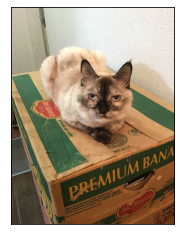

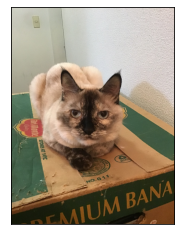

In [5]:
imshow(cat1)
imshow(cat2)

## Affine Transform

$$\left(\begin{array}{l}
x^{\prime} \\
y^{\prime} \\
1
\end{array}\right)=\left(\begin{array}{lll}
a & b & t_{x} \\
c & d & t_{y} \\
0 & 0 & 1
\end{array}\right)\left(\begin{array}{l}
x \\
y \\
1
\end{array}\right)$$

OpenCV3's API of Affine Transform

```python
cv2.warpAffine(
    src,           # ndarray src image
    M,             # convert Matrix [2x3]
    dsize,         # tuple of image size (W, H)
    [dst],         # background image
    [flags],       # interpolation
                   # (INTER_NEAREST, INTER_LINEAR)
                   # (INTER_CUBIC, INTER_LANCZOS4) 
    [borderMode],  # (BORDER_CONSTANT, BORDER_REPLICATE,
                   #  BORDER_REFLECT, ...)
    [borderValue]  # (BGR)
)
```

In [6]:
# img shape
h, w, c = cat1.shape

# vertical moving matrix
mat = np.array([
    [1, 0, 0],
    [0, 1, 300]
], dtype=np.float32)

In [7]:
cat1_affine = cv2.warpAffine(cat1, mat, (w, h))

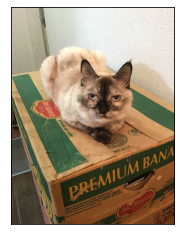

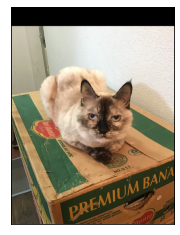

In [8]:
imshow(cat1)
imshow(cat1_affine)

## Affine Transform by PyTorch

In [9]:
!pip3 install kornia

In [10]:
import torch
import kornia

In [11]:
# convert to torch tensor
cat1_tensor = kornia.image_to_tensor(cat1, keepdim=False)  # BxCxHxW

print(cat1_tensor.shape)
print(cat1_tensor.dtype)

torch.Size([1, 3, 3264, 2448])
torch.uint8


In [12]:
cat1_tensor.min(), cat1_tensor.max()

(tensor(0, dtype=torch.uint8), tensor(255, dtype=torch.uint8))

In [13]:
# we optimizer this matrix parameters
mat_tensor = torch.tensor([[
    [1, 0, 0],
    [0, 1, 300]
]], dtype=torch.float)

print(mat_tensor.shape)

torch.Size([1, 2, 3])


In [14]:
cat1_tensor_affine = kornia.warp_affine(
    cat1_tensor.float(),
    mat_tensor,
    dsize=(h, w)
)

In [15]:
cat1_tensor_affine.min(), cat1_tensor_affine.max()

(tensor(0.), tensor(255.0000))

In [16]:
def imshow_tensor(img_tensor):
    r"""
    img_tensor (torch.Tensor): the image tensor of shape [C x H x W]
    """
    img = img_tensor.permute(1, 2, 0).to(dtype=torch.uint8).cpu().numpy()
    imshow(img)

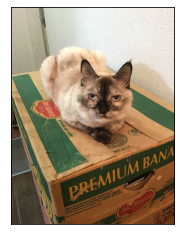

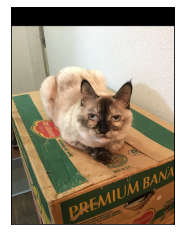

In [17]:
imshow_tensor(cat1_tensor[0])
imshow_tensor(cat1_tensor_affine[0])